In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import image_utils as iu
import cv2

In [44]:
src  = './nordata/ck_test/8.jpg'
dest = './nordata/ck_test/8.denoised.jpg'
original_image = iu.load_img(src)

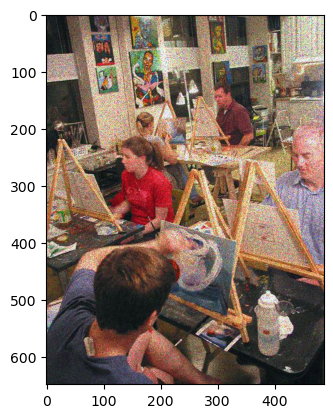

In [45]:
plt.imshow(original_image)

In [46]:
original_imgarr = iu.img_to_array(original_image)/255
original_shape = original_imgarr.shape
x,y,z = original_shape
original_size = (y,x)

In [47]:
original_shape


(648, 486, 3)

In [48]:
original_size

(486, 648)

In [49]:
resized_imgarr = cv2.resize(original_imgarr, (412,412), interpolation = cv2.INTER_AREA)

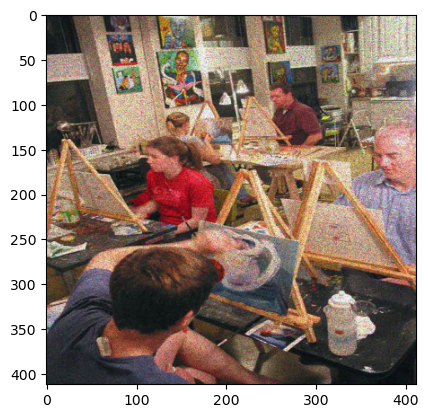

In [50]:
plt.imshow(resized_imgarr)

In [51]:
type(resized_imgarr)

numpy.ndarray

In [52]:
model = keras.models.load_model('./model_final.h5')
denoised_imgarr = model.predict(resized_imgarr.reshape(-1,412,412,3))

1/1 [==============================] - 0s 172ms/step


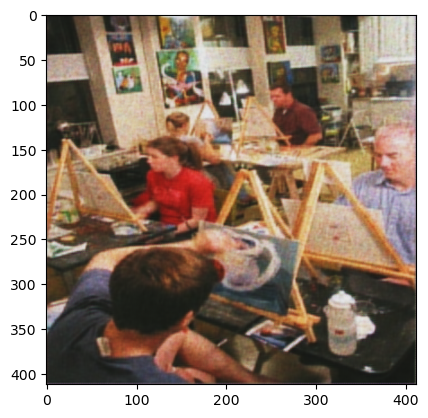

In [53]:
plt.imshow(denoised_imgarr[0])

In [54]:
denoised_image = cv2.resize(denoised_imgarr.reshape(412,412,3),original_size,interpolation=cv2.INTER_AREA)

In [55]:
denoised_image = iu.array_to_img(denoised_image)

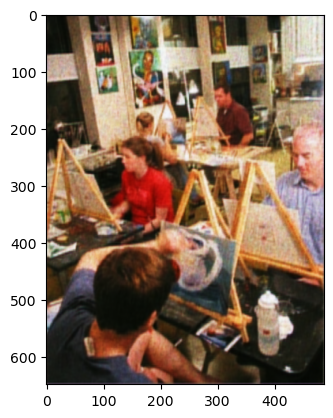

In [56]:
plt.imshow(denoised_image)

In [57]:
iu.save_img(dest, denoised_image)